In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('/content/bank-dataset-use-for-marketing.csv', sep = ';')

Let's read the data and look at the first 5 rows using the head method. The number of the output rows from the dataset is determined by the head method parameter.

In [9]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
#lets look the dataset size , feature and their type
df.shape

(41188, 21)

The dataset contains 41188 objects (rows), for each of which 21 features are

set (columns), including 1 target feature (y).

Attributing information
Output the column (feature) names:

In [11]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Input features (column names):

age - client's age in years (numeric)

job - type of job (categorical: admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown)

marital - marital status (categorical: divorced, married, single, unknown)

education - client's education (categorical: basic.4y, basic.6y, basic.9y, high.

school, illiterate, professional.course, university.degree, unknown)

default - has credit in default? (categorical: no, yes, unknown)

housing - has housing loan? (categorical: no, yes, unknown)
loan - has personal loan? (categorical: no, yes, unknown)
contact - contact communication type (categorical: cellular, telephone)
month - last contact month of the year (categorical: jan, feb, mar, ..., nov, dec)
day_of_week - last contact day of the week (categorical: mon, tue, wed, thu, fri)
duration - last contact duration, in seconds (numeric).
campaign - number of contacts performed and for this client during this campaign (numeric, includes the last contact)
pdays - number of days that have passed after the client was last contacted from the previous campaign (numeric; 999 means the client has not been previously contacted)
previous - number of contacts performed for this client before this campaign (numeric)
poutcome - outcome of the previous marketing campaign (categorical: failure, nonexistent, success)
emp.var.rate - employment variation rate, quarterly indicator (numeric)
cons.price.idx - consumer price index, monthly indicator (numeric)
cons.conf.idx - consumer confidence index, monthly indicator (numeric)
euribor3m - euribor 3 month rate, daily indicator (numeric)
nr.employed - number of employees, quarterly indicator (numeric)
Output feature (desired target):

y - has the client subscribed a term deposit? (binary: yes,no)

In [12]:
#to see genereal information in all data. we use info method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

As we can see, the dataset is full, no pass (non-null), so there is no need to fill the gaps. The dataset contains 5 integer (int64), 5 real (float64) and 11 categorical and binary (object) features.

Method describe shows the main statistical characteristics of the dataset for each numerical feature (int64 and float64 types): the existing values number, mean, standard deviation, range, min & max, 0.25, 0.5 and 0.75 quartiles.

In [13]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [14]:
#df.describe(include= 'all')
df.describe(include= ['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


The result shows that the average client refers to administrative staff (job = admin.), is married (marital = married) and has a university degree (education = university.degree).

For categorical (type object) and boolean (type bool) features you can use the value_counts method. Let's look at the target feature (y) distribution:

In [15]:
y_counts = df['y'].value_counts()

4640 clients (11.3%) of 41188 issued a term deposit, the value of the variable y equals yes

In [16]:
#1- What is the distribution of the target variable (y)? How many clients subscribed to a term deposit?

In [17]:
y_percentage = df['y'].value_counts(normalize=True)*100
y_percentage

,proportion
y,
no,88.734583
yes,11.265417


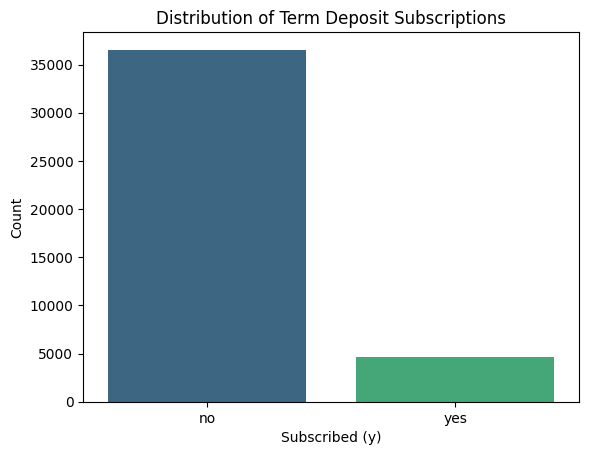

In [18]:
dark_palette = sns.dark_palette('seagreen')
sns.countplot(data = df, x ='y', palette= 'viridis')
plt.title('Distribution of Term Deposit Subscriptions')
plt.xlabel('Subscribed (y)')
plt.ylabel('Count')
plt.show()

In [19]:
#2. What is the age distribution of clients? Are there noticeable patterns based on age groups?

<Axes: xlabel='age', ylabel='Count'>

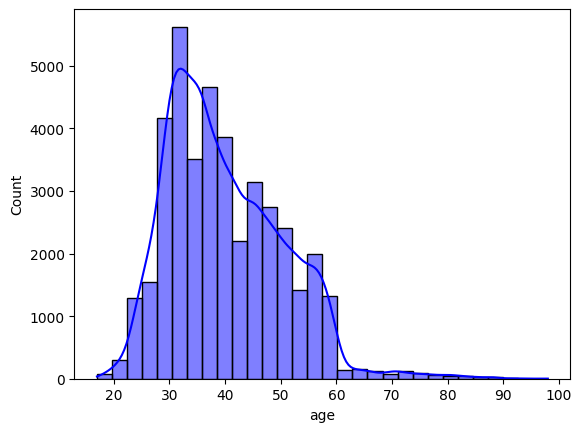

In [20]:
sns.histplot(df['age'], bins= 30, kde =True, color ='blue')

In [21]:
#age segmentations
bins = [0,25,40,60,100]
labels = ['<25', '25-40', '40-60', '>60']
df['age_group'] = pd.cut(df['age'], bins = bins, labels= labels)

In [22]:
df.head(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40-60


In [23]:
#count of subscription by age group

age_group_counts = df.groupby('age_group')['y'].value_counts(normalize=True).unstack()*100

age_group_counts


y,no,yes
age_group,,
<25,79.051621,20.948379
25-40,89.267940,10.732060
40-60,90.884313,9.115687
>60,54.505495,45.494505


<Axes: xlabel='age_group'>

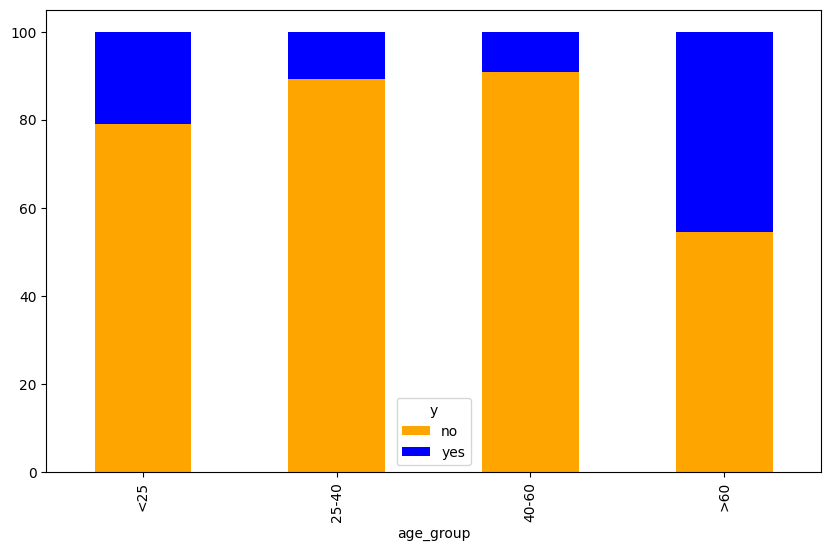

In [24]:
age_group_counts.plot(kind ='bar', stacked= True, color=['orange','blue'], figsize=(10,6))

In [26]:
#task- barplot
#3 What are the most common jobs among clients, and how does job type relate to term deposit subscription rates?

In [29]:
df.head(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40-60


In [30]:
job_counts = df['job'].value_counts()

In [31]:
job_counts

,count
job,
admin.,10422
blue-collar,9254
technician,6743
services,3969
management,2924
retired,1720
entrepreneur,1456
self-employed,1421
housemaid,1060


In [47]:
job_sub_rate = df.groupby('job')['y'].value_counts(normalize=True).unstack()*100

In [48]:
job_sub_rate

y,no,yes
job,,
admin.,87.027442,12.972558
blue-collar,93.105684,6.894316
entrepreneur,91.483516,8.516484
housemaid,90.000000,10.000000
management,88.782490,11.217510
retired,74.767442,25.232558
self-employed,89.514426,10.485574
services,91.861930,8.138070
student,68.571429,31.428571


In [49]:
job_sub_rate = job_sub_rate.reset_index()

In [50]:
job_sub_rate.columns.name =None

In [51]:
job_sub_rate

,job,no,yes
0,admin.,87.027442,12.972558
1,blue-collar,93.105684,6.894316
2,entrepreneur,91.483516,8.516484
3,housemaid,90.000000,10.000000
4,management,88.782490,11.217510
5,retired,74.767442,25.232558
6,self-employed,89.514426,10.485574
7,services,91.861930,8.138070
8,student,68.571429,31.428571
9,technician,89.173958,10.826042


In [54]:
melted_df = job_sub_rate.melt(id_vars = 'job', var_name ='subscription', value_name ='percentage')

In [55]:
melted_df

,job,subscription,percentage
0,admin.,no,87.027442
1,blue-collar,no,93.105684
2,entrepreneur,no,91.483516
3,housemaid,no,90.000000
4,management,no,88.782490
5,retired,no,74.767442
6,self-employed,no,89.514426
7,services,no,91.861930
8,student,no,68.571429
9,technician,no,89.173958


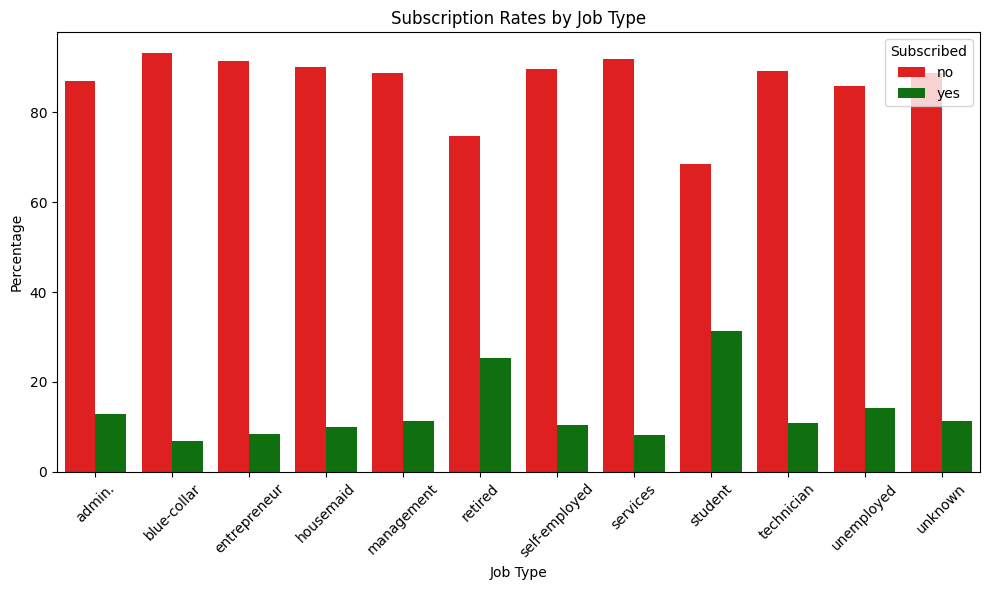

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_df, x='job', y='percentage', hue='subscription', palette=['red', 'green'])
plt.title('Subscription Rates by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Subscribed')
plt.tight_layout()
plt.show()

In [61]:
#4. How does marital status affect the likelihood of subscribing to a term deposit?

In [62]:
marital_sub_rate = df.groupby('marital')['y'].value_counts(normalize=True).unstack()*100

In [63]:
marital_sub_rate

y,no,yes
marital,,
divorced,89.679098,10.320902
married,89.842747,10.157253
single,85.995851,14.004149
unknown,85.000000,15.000000


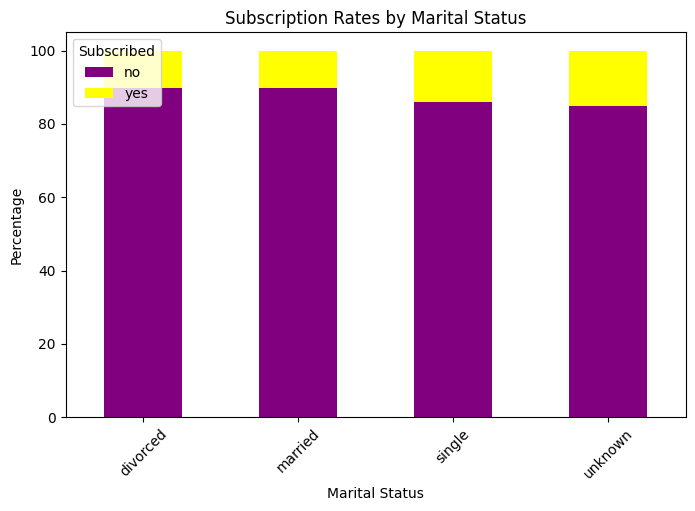

In [67]:
marital_sub_rate.plot(kind='bar', stacked= True, figsize=(8,5), color =['purple', 'yellow'])
plt.title('Subscription Rates by Marital Status')
plt.ylabel('Percentage')
plt.xlabel('Marital Status')
plt.legend(title='Subscribed', loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [68]:
#5How does the level of education impact term deposit subscriptions?

In [71]:
education_sub_rate = df.groupby('education')['y'].value_counts(normalize=True).unstack()*100

In [72]:
education_sub_rate

y,no,yes
education,,
basic.4y,89.750958,10.249042
basic.6y,91.797557,8.202443
basic.9y,92.175352,7.824648
high.school,89.164477,10.835523
illiterate,77.777778,22.222222
professional.course,88.651535,11.348465
university.degree,86.275477,13.724523
unknown,85.499711,14.500289


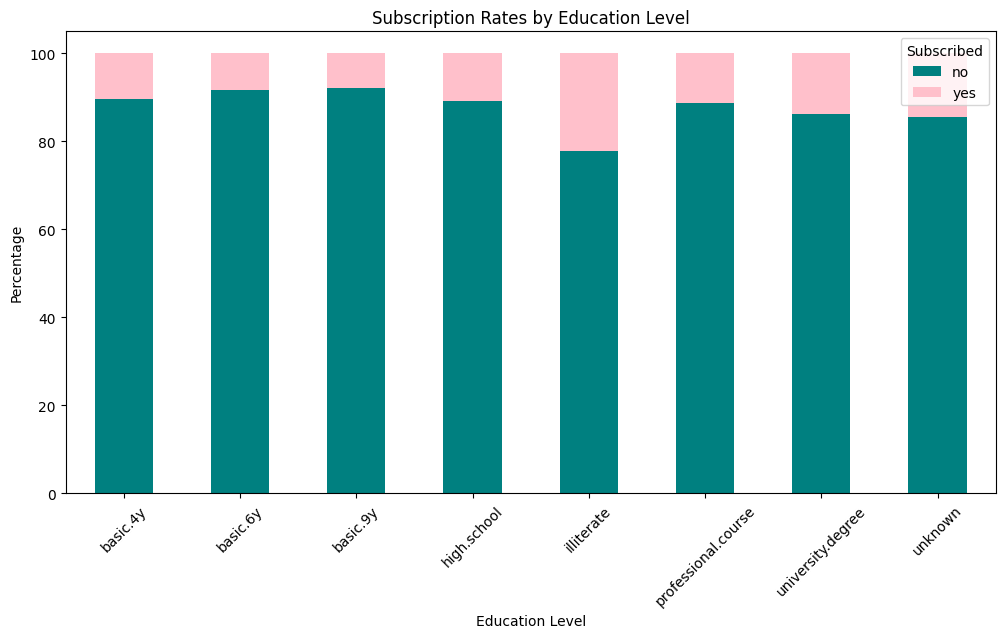

In [75]:
education_sub_rate .plot(kind='bar', stacked=True, figsize=(12, 6), color=['teal', 'pink'])
plt.title('Subscription Rates by Education Level')
plt.ylabel('Percentage')
plt.xlabel('Education Level')
plt.legend(title='Subscribed')
plt.xticks(rotation=45)
plt.show()

In [76]:
#6.. Suggested Questions (Incorporated)
#6. What is the share of clients attracted (subscribed) in the source data?

In [78]:
total_client = len(df)
total_client

41188

In [85]:
sub_client = len(df[df['y']=='yes'])
sub_client

4640

In [86]:
not_sub_client = len(df[df['y']=='no'])
not_sub_client

36548

In [87]:
sub_percentage = (sub_client /total_client)*100
not_sub_percentage = (not_sub_client /total_client)*100

In [88]:
sub_percentage

11.265417111780131

In [89]:
not_sub_percentage

88.73458288821988

([<matplotlib.patches.Wedge at 0x7b6ad75f4040>,
 [Text(-1.035473530536127, 0.37120690666937856, 'sub'),
  Text(1.2237413938365864, -0.4386992147370325, 'non_sub')],
 [Text(-0.5648037439287964, 0.20247649454693373, '11.27%'),
  Text(0.7530716269763608, -0.2699687475304815, '88.73%')])

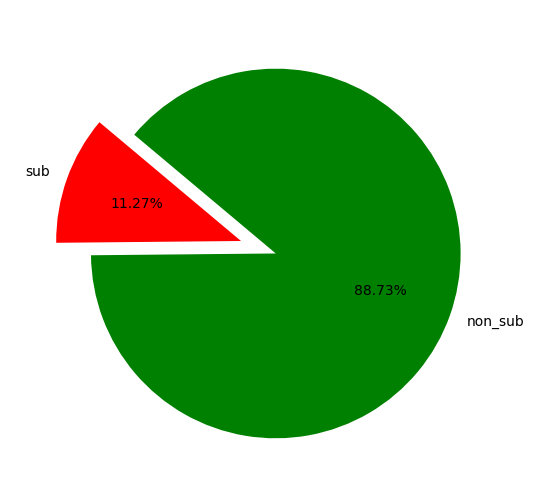

In [95]:
plt.figure(figsize=(8,6))
data =[sub_percentage, not_sub_percentage ]
labels = ['sub', 'non_sub']
plt.pie(data, explode=(0, 0.2), labels=labels, autopct= '%1.2f%%', colors =['red', 'green'],startangle= 140)

In [96]:
#Question 7: What are the mean values of numerical features among the attracted clients?

In [100]:
sub_client_1 = df[df['y']=='yes']

In [101]:
sub_client_1.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000
mean,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991
std,13.837476,401.171871,1.666245,403.407181,0.860344,1.623626,0.676644,6.139668,1.742598,87.572641
min,17.000000,37.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,253.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,0.849000,5017.500000
50%,37.000000,449.000000,2.000000,999.000000,0.000000,-1.800000,93.200000,-40.400000,1.266000,5099.100000
75%,50.000000,741.250000,2.000000,999.000000,1.000000,-0.100000,93.918000,-36.100000,4.406000,5191.000000
max,98.000000,4199.000000,23.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [102]:
# Select numerical features
numerical_columns = df.select_dtypes(include=['number']).columns

In [103]:
numerical_columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [104]:
num_mean = sub_client_1[numerical_columns].mean()

In [105]:
num_mean

,0
age,40.913147
duration,553.191164
campaign,2.051724
pdays,792.035560
previous,0.492672
emp.var.rate,-1.233448
cons.price.idx,93.354386
cons.conf.idx,-39.789784
euribor3m,2.123135
nr.employed,5095.115991


<Axes: >

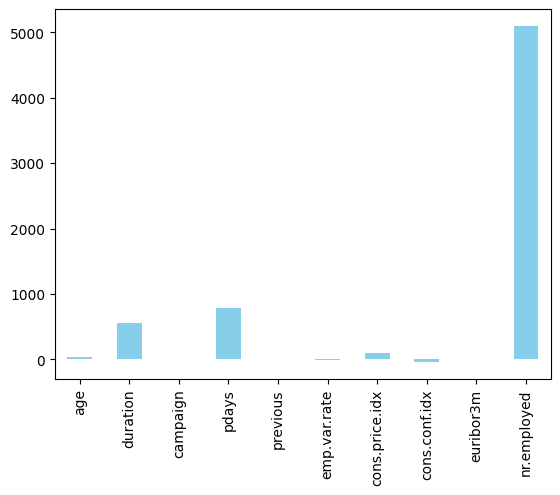

In [106]:
num_mean.plot(kind='bar', color ='skyblue')